<a href="https://colab.research.google.com/github/bimal-bp/E-commerce-Product-recommendation-System.ipynb/blob/ML_MODELS/E_commerce_Product_recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ratings_Electronics.csv',header=None)
df.columns=['user_id','prod_id','rating','timestamp']
df=df.drop('timestamp',axis=1)
final=df.copy(deep=True)

In [3]:
final.head(5)

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [4]:
final.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

In [5]:
final.shape

(7824482, 3)

In [6]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   prod_id  object 
 2   rating   float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [7]:
round(final.describe(),3)

,rating
count,7824482.000
mean,4.012
std,1.381
min,1.000
25%,3.000
50%,5.000
75%,5.000
max,5.000


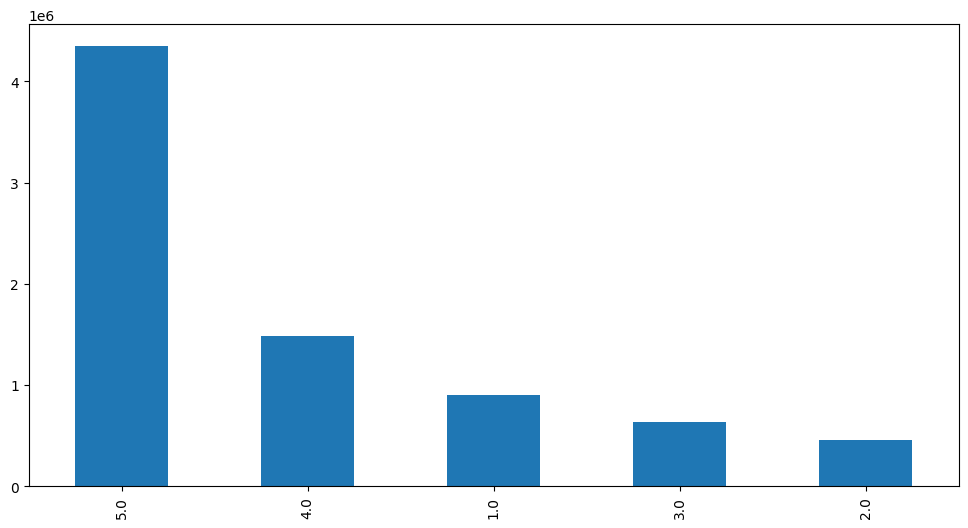

In [14]:
plt.figure(figsize=(12,6))
final['rating'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='rating', ylabel='Density'>

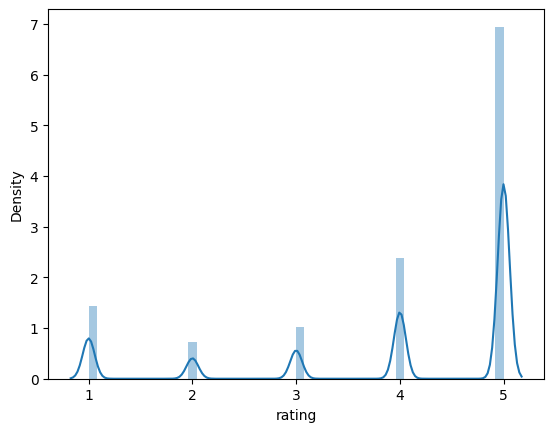

In [15]:
sns.distplot(final['rating'])

In [11]:
final['user_id'].nunique()

4201696

In [12]:
final['prod_id'].nunique()

476002

In [17]:
most_rated=final.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [18]:
#PREPROCESSING
# BY TAKING A SUBSET OF DATASET OF 50+ RATING BY USERS
counts = final['user_id'].value_counts()
df_final=final[final['user_id'].isin(counts[counts>=50].index)]

In [19]:
dff=df_final.copy()

In [20]:
dff.shape

(125871, 3)

In [21]:
dff['user_id'].nunique()

1540

In [22]:
dff['prod_id'].nunique()

48190


The density of a rating matrix refers to the proportion of observed (non-empty) ratings or entries in the matrix compared to the total number of possible ratings in the matrix. In the context of recommendation systems or collaborative filtering, this matrix is typically represented as a user-item matrix, where rows represent users, columns represent items (products, movies, etc.), and the entries contain the ratings or preferences given by users to items.

The formula to calculate the density of the rating matrix is:

Density
=
Number of Observed Ratings
Total Number of Possible Ratings
Density=
Total Number of Possible Ratings
Number of Observed Ratings
​




In [29]:
# CREATING THE INTERACTION MATRIx
final_ratings_matrix=dff.pivot(index='user_id',columns='prod_id',values='rating').fillna(0)
print("shape of matrix is:",final_ratings_matrix.shape)
# finding non zero
given_num_of_ratings=np.count_nonzero(final_ratings_matrix)
print("total non zero is about:",given_num_of_ratings)
#Possible number of ratings
possible_num_of_ratings=final_ratings_matrix.shape[0]*final_ratings_matrix.shape[1]
print("possible_num_of_ratings is :",possible_num_of_ratings)

#density

density=(given_num_of_ratings/possible_num_of_ratings)
density *=100
print("density:",round(density,3))

final_ratings_matrix.head(3)

shape of matrix is: (1540, 48190)
total non zero is about: 125871
possible_num_of_ratings is : 74212600
density: 0.17


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Collaborative Filtering based Recommendation System

In [30]:
final_ratings_matrix.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
final_ratings_matrix.shape

(1540, 48190)

In [37]:
final_ratings_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1540 entries, A100UD67AHFODS to AZOK5STV85FBJ
Columns: 48190 entries, 0594451647 to B00LKG1MC8
dtypes: float64(48190)
memory usage: 566.2+ MB


Here, user_id (index) is of the object data type. We will replace the user_id by numbers starting from 0 to 1539 (for all user ids) so that the index is of integer type and represents a user id in the same format

In [38]:
final_ratings_matrix['user_index']=np.arange(0,final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'],inplace=True)

In [39]:
final_ratings_matrix.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Function to find Similar users and their similarity scores

In [43]:
#Function to find Similar users and their similarity scoresd
def similar_users(user_index,interaction_matrix):
  similarity=[]
  for user in range(0,interaction_matrix.shape[0]):
    sim=cosine_similarity([interaction_matrix.loc[user_index]],[interaction_matrix.loc[user]])
    similarity.append((user,sim))

  similarity.sort(key=lambda x:x[1],reverse=True)
  most_similar_users=[tup[0] for tup in similarity]
  similarity_score=[tup[1] for tup in similarity]

  # remove the original user and similarity score and keep other similar users
  most_similar_users.append(user_index)
  similarity_score.remove(similarity_score[0])

  return most_similar_users,similarity_score

In [44]:
#   Finding out top 10 similar users to the user index 3 and their similarity score
similar=similar_users(3,final_ratings_matrix)[0][0:10]
similar

[3, 320, 12, 793, 261, 156, 1493, 1250, 567, 753]

In [46]:
similar_users(3,final_ratings_matrix)[1][0:10]

[array([[0.05662371]]),
 array([[0.05549645]]),
 array([[0.05098326]]),
 array([[0.05024185]]),
 array([[0.05003874]]),
 array([[0.04930111]]),
 array([[0.04889354]]),
 array([[0.04672744]]),
 array([[0.04637283]]),
 array([[0.04492668]])]

In [47]:
# NON SIMILAR USER FOR 1521
similar=similar_users(1521,final_ratings_matrix)[0][0:10]
similar

[1521, 991, 1065, 1012, 1402, 1371, 1278, 1518, 692, 785]

In [48]:
similar_users(1521,final_ratings_matrix)[1][0:10]

[array([[0.10889304]]),
 array([[0.10538068]]),
 array([[0.1026758]]),
 array([[0.09418291]]),
 array([[0.09149062]]),
 array([[0.09135361]]),
 array([[0.09028898]]),
 array([[0.08735684]]),
 array([[0.08673386]]),
 array([[0.08478815]])]

In [49]:
# FUNCTION TO RECOMEND PRODUCTS
def recommendation(user_index,num_of_products,interaction_matrix):
  most_similar_users=similar_users(user_index,interaction_matrix)[0]

  prod_ids=set(list(interaction_matrix.columns[np.where(interaction_matrix.loc[user_index]>0)]))
  recommendation=[]
  observed_interaction=prod_ids.copy()
  for similar_user in most_similar_users:
    if len(recommendation)<num_of_products:
      similar_user_prod_ids=set(list(interaction_matrix.columns[np.where(interaction_matrix.loc[similar_user]>0)]))
      recommendation.extend(list(similar_user_prod_ids.difference(observed_interaction)))
      observed_interaction=observed_interaction.union(similar_user_prod_ids)
    else:
      break
  return recommendation[:num_of_products]

In [52]:

recommendation(3,5,final_ratings_matrix)

['B000NPE59E', 'B001TAAVP4', 'B0015ZIS8K', 'B005FAPYXS', 'B00020S7XK']

In [53]:

recommendation(1521,5,final_ratings_matrix)

['B006OZEIKS', 'B007XOQUY6', 'B001DZVS52', 'B008ULPE70', 'B008ULPA2O']

# **Rank Based Recommendation System**

In [54]:
#Calculate the average rating for each product
average_rating = df_final.groupby('prod_id').mean()['rating']

#Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id').count()['rating']

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

,avg_rating,rating_count
prod_id,,
0594451647,5.0,1
B003RRY9RS,5.0,1
B003RR95Q8,5.0,1
B003RIPMZU,5.0,1
B003RFRNYQ,5.0,2


In [55]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]

In [56]:

list(top_n_products(final_rating, 5, 50))

['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

In [57]:

list(top_n_products(final_rating, 5, 100))

['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']